In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing

In [2]:
pd.set_option("display.max_columns", None)
insurance_claims = pd.read_csv('insurance_claims.csv')

print(insurance_claims.shape, '\n')
insurance_claims.head()

(1000, 40) 



,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
insurance_claims.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [5]:
insurance_claims.describe(include = 'object')

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,909,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,4,4,4,7,7,1000,3,3,14,39,2
top,1992-08-05,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,2015-02-02,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,1416 Cherokee Ridge,?,?,Saab,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,292,354,292,262,157,1,360,343,80,43,753


In [6]:
# removing unnecessary columns
insurance_claims = insurance_claims.drop(columns = ['policy_number', 'policy_state', 'insured_hobbies', 'incident_state', 'incident_city', 
                                                    'incident_location', '_c39', 'auto_model', 'auto_make', 'insured_occupation', 'auto_year', 
                                                    'insured_zip'])

In [7]:
# replacing '?' entires
insurance_claims[['police_report_available', 'collision_type', 'property_damage']] = insurance_claims[['police_report_available', 'collision_type', 'property_damage']].replace("?", "NO")

In [8]:
# checking missing values
print(insurance_claims.isna().sum(), '\n')
# doubled checked the original dataset and missing entires are supposed to be 'None'
insurance_claims['authorities_contacted'] = insurance_claims['authorities_contacted'].fillna('No')

months_as_customer              0
age                             0
policy_bind_date                0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_sex                     0
insured_education_level         0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_available         0
total_claim_amount              0
injury_claim                    0
property_claim                  0
vehicle_claim                   0
fraud_reported                  0
dtype: int64 



Unique date values are not very useful for modelling, as they introduce high cardinality without meaning. In this case, a good approach would be to derive the difference between the policy and incident date, which represents the customer's tenure at the time of the incident.

Another interesting observation is that the column `months_as_customers` seems to show a different time amount compared to the calculated tenure. This should not be the case because the columns should have the same meaning. One possible reason is the customer was with the insurance firm before the policy was put in place. However, this should mean that each `months_as_customers` entry would end up with a greater time than the tenure, which is not the case.

In [9]:
# checking number of unique entries
insurance_claims.nunique()

months_as_customer             391
age                             46
policy_bind_date               951
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_date                   60
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries                  3
witnesses                        4
police_report_available          2
total_claim_amount             763
injury_claim                   638
property_claim                 626
vehicle_claim                  726
fraud_reported                   2
dtype: int64

In [10]:
insurance_claims['policy_age'] = pd.to_datetime(insurance_claims['incident_date']) - pd.to_datetime(insurance_claims['policy_bind_date'])
insurance_claims['policy_age'] = insurance_claims['policy_age'].dt.days 
insurance_claims = insurance_claims.drop(columns = ['incident_date', 'policy_bind_date'])

## Numeric Columns

Before analysis, we see that there is an `umbrella_limit` that is below 0, which should not be possible. The row could be removed, or the value could be changed to 0. In this case the row is removed. 

The boxplots do not reveal any values that are unrealistic, which results in no rows being altered. 

Correlation analysis mostly shows reasonable relationships across the numeric features. However, there are four columns which need to be looked at. The `age` and `months_as_customer` columns are highly correlated. As the `months_as_customer ` does not have a clear definition, it will be removed. Further, the `total_claim_amount` is correlated with the `injury_claim`, `propertly_claim`, and `vehicle_claim` as it is the direct sum of the claims. It will be removed as it is redundant. 

In [11]:
insurance_claims = insurance_claims[insurance_claims['umbrella_limit'] >= 0]

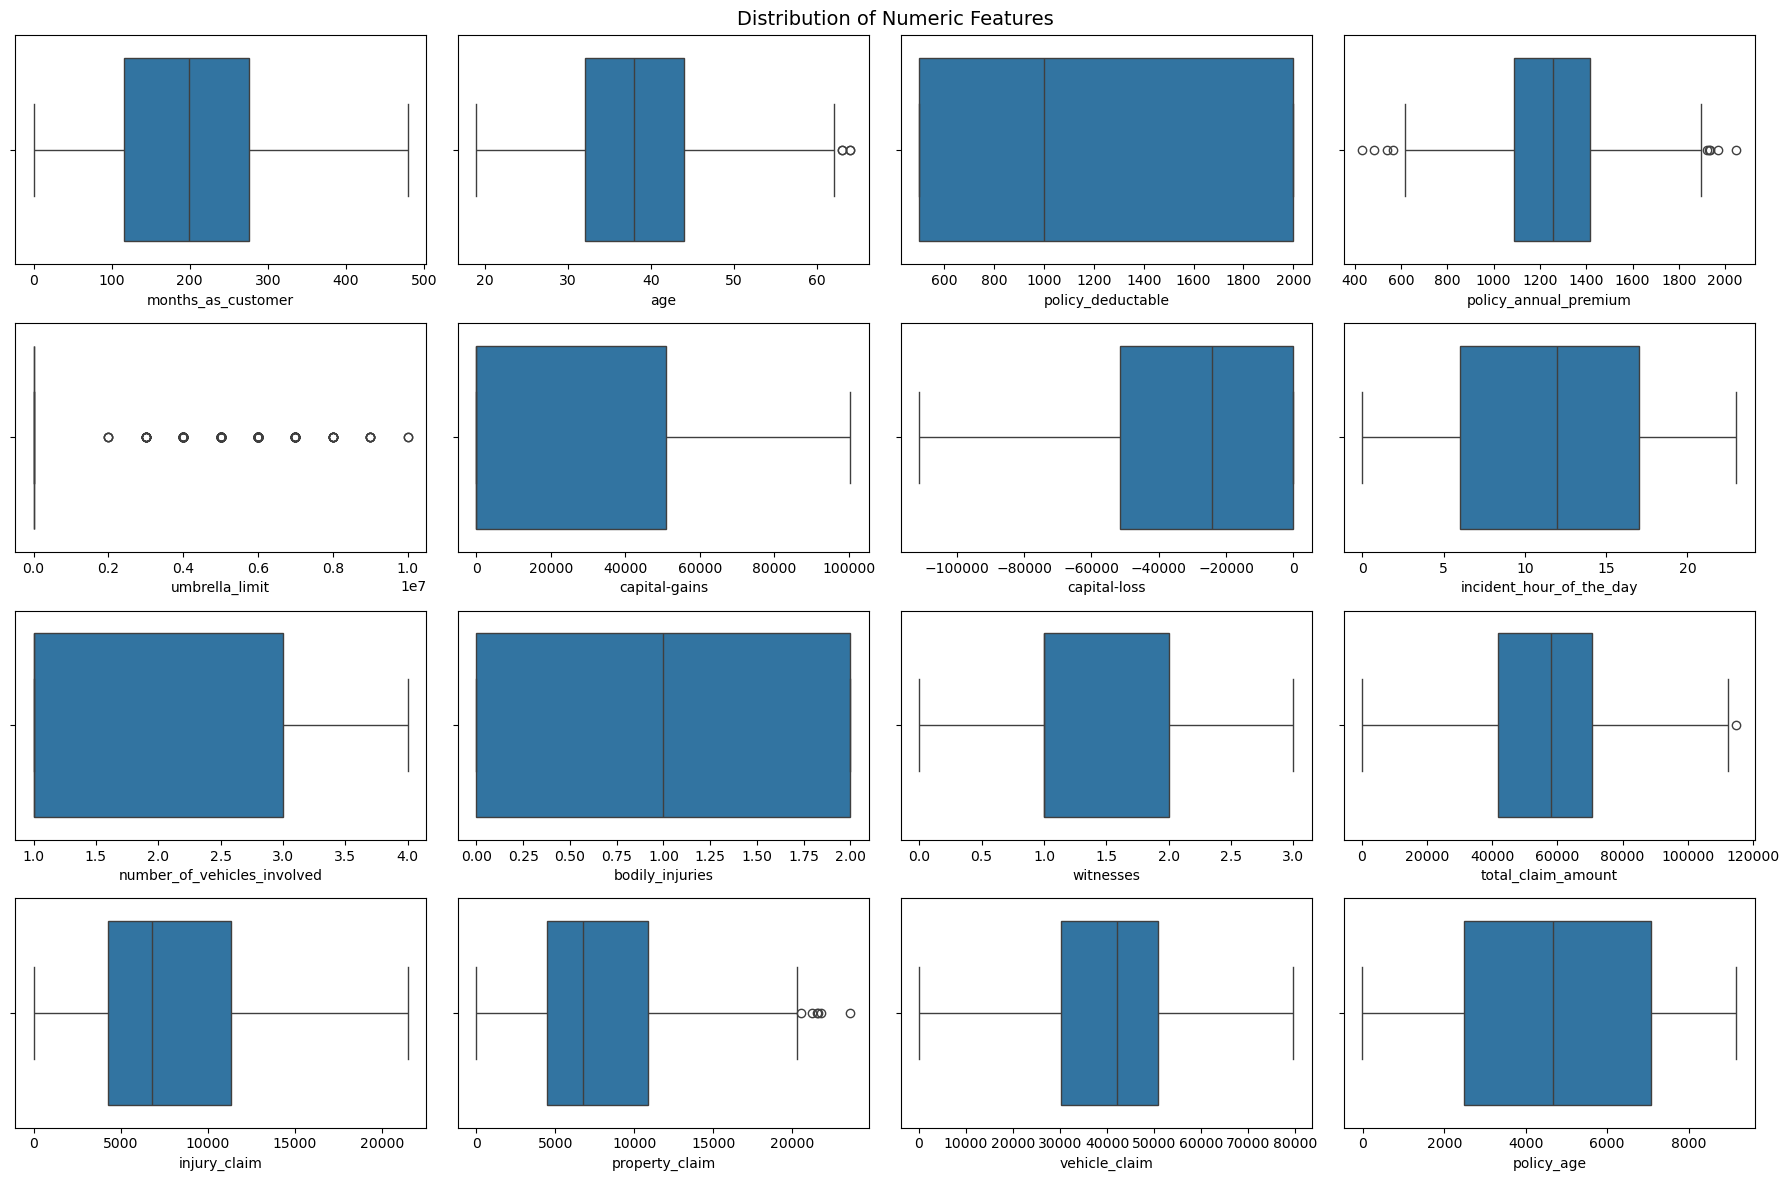

In [12]:
numeric = insurance_claims.select_dtypes(include = ['int64', 'float64'])

fig, axes = plt.subplots(4, 4, figsize = (18, 12))
axes = axes.flatten()
plt.suptitle('Distribution of Numeric Features', fontsize = 14)

for i in range(len(numeric.columns)):
    sns.boxplot(x = numeric[numeric.columns[i]], ax = axes[i])

plt.tight_layout()
plt.show()

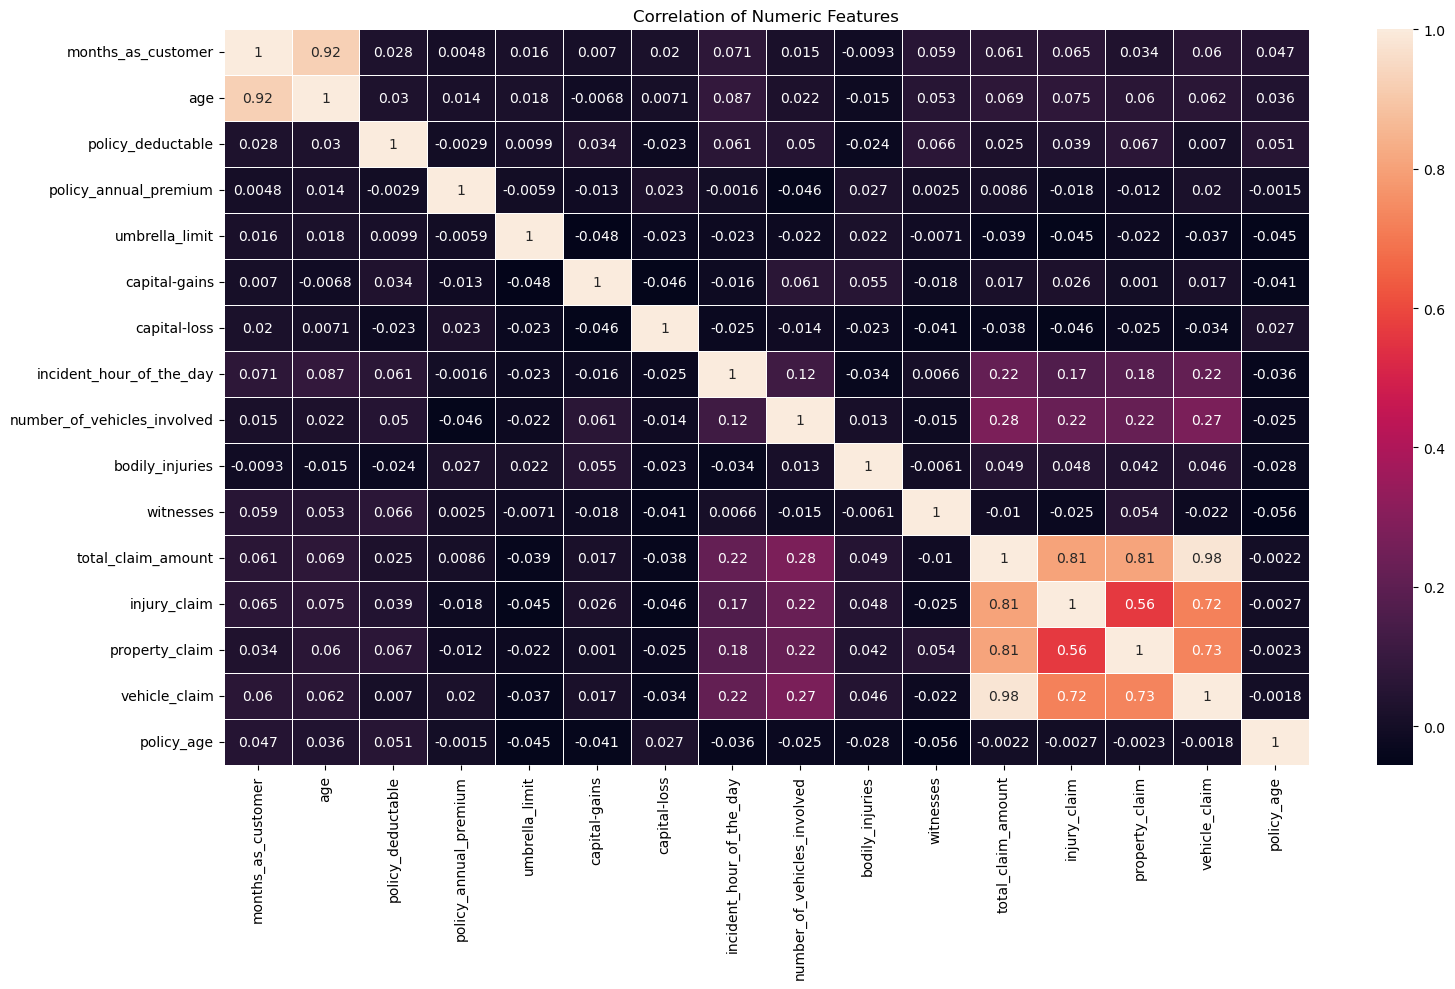

In [13]:
numeric_corr = numeric.corr()

plt.figure(figsize = (16, 10))

sns.heatmap(numeric_corr, annot = True, fmt = '.2g', linewidths = 0.5)
plt.title('Correlation of Numeric Features')

plt.tight_layout()
plt.show()

In [14]:
numeric = numeric.drop(columns = ['months_as_customer', 'total_claim_amount'])

## Categorical Columns

seems to be a good distribution of values from the bar chart

one hot encode everything that cannot be binary

In [15]:
categorical = insurance_claims.select_dtypes(include = ['object'])

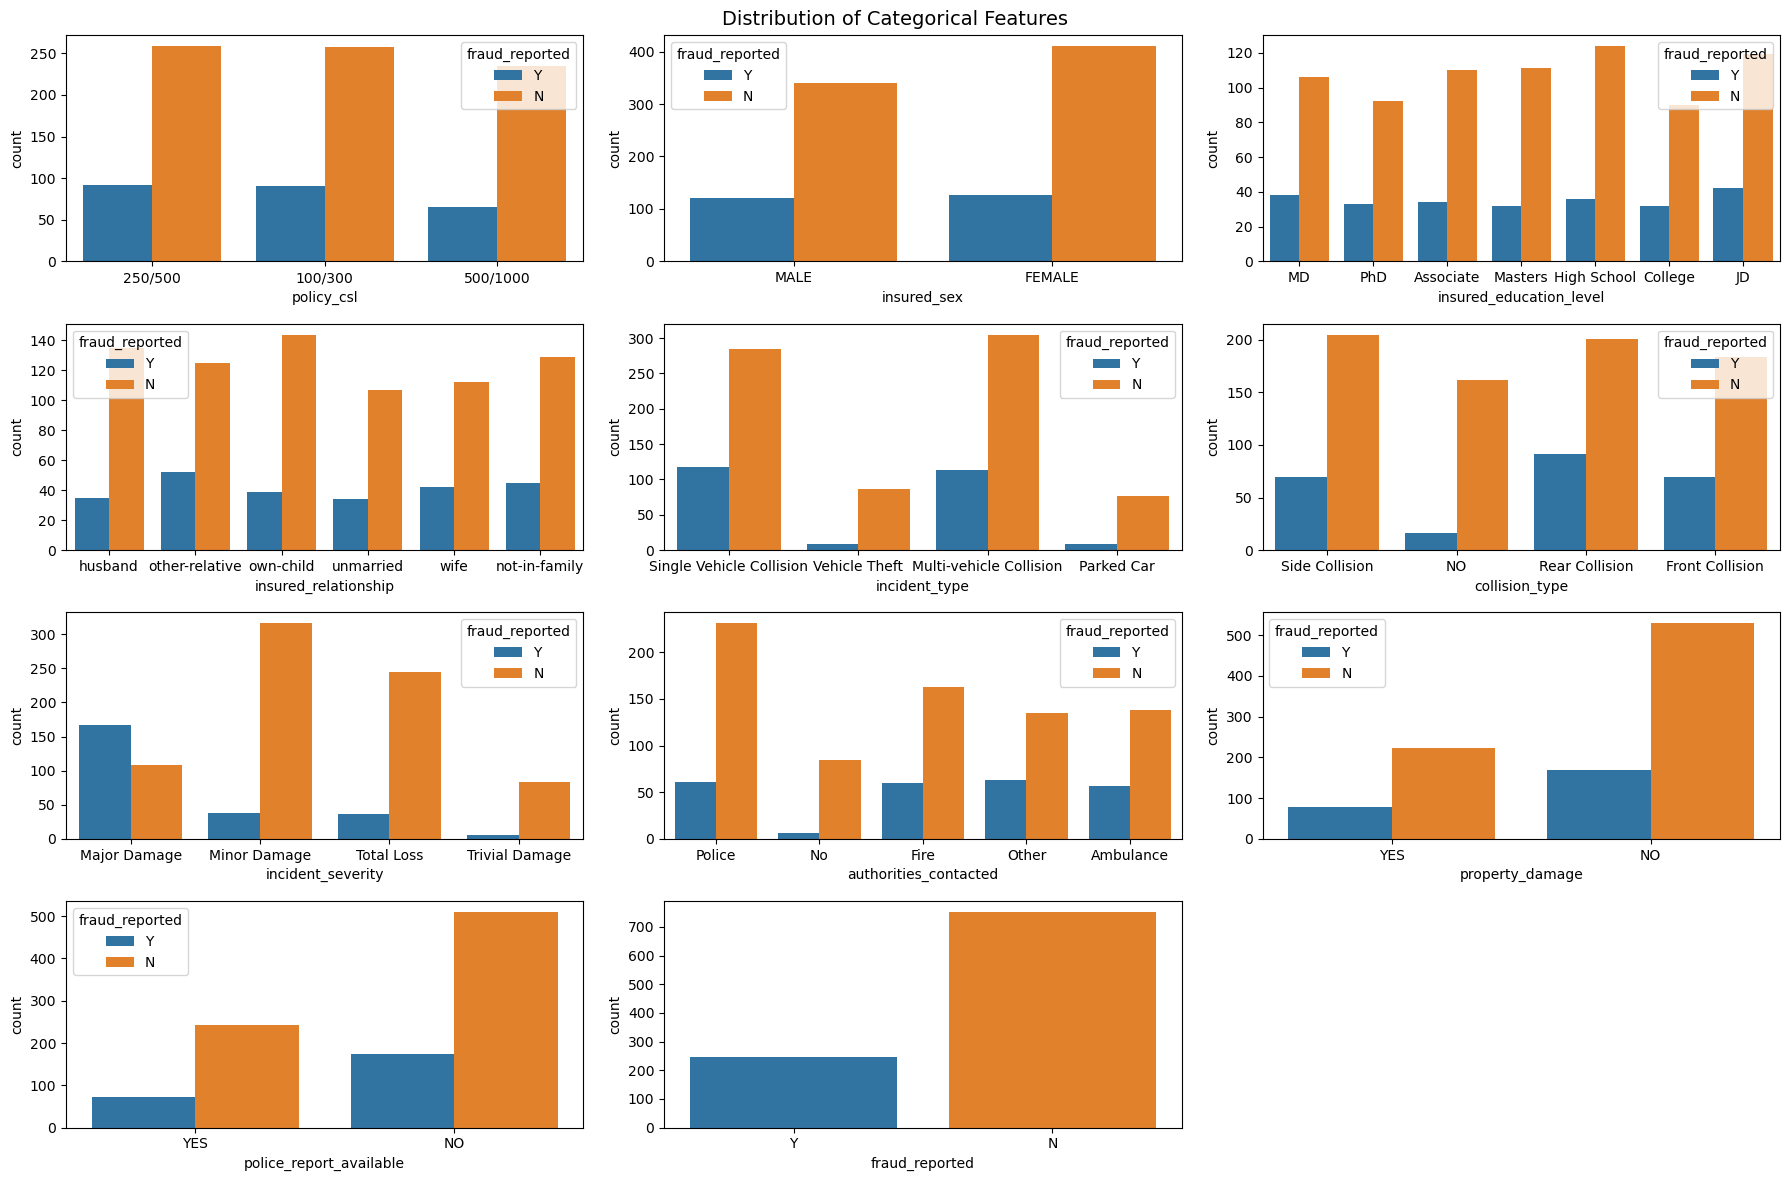

In [16]:
fig, axes = plt.subplots(4, 3, figsize = (18, 12))
axes = axes.flatten()
plt.suptitle('Distribution of Categorical Features', fontsize = 14)

for i in range(len(categorical.columns)):
    sns.countplot(x = categorical[categorical.columns[i]], data = categorical, ax = axes[i], hue = categorical['fraud_reported'])

axes[11].set_visible(False)

plt.tight_layout()
plt.show()

In [17]:
categorical.head()

,policy_csl,insured_sex,insured_education_level,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,other-relative,Vehicle Theft,NO,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,unmarried,Vehicle Theft,NO,Minor Damage,No,NO,NO,N


In [18]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoding = ['policy_csl', 'insured_education_level', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 
                    'authorities_contacted']
binary_encoding = ['insured_sex', 'property_damage', 'police_report_available', 'fraud_reported']

categorical['insured_sex'] = categorical['insured_sex'].map({'FEMALE': 0, 'MALE': 1})
categorical['property_damage'] = categorical['property_damage'].map({'NO': 0, 'YES': 1})
categorical['police_report_available'] = categorical['police_report_available'].map({'NO': 0, 'YES': 1})
categorical['fraud_reported'] = categorical['fraud_reported'].map({'N': 0, 'Y': 1})

encoder = OneHotEncoder(sparse_output = False).set_output(transform = 'pandas')
one_hot = encoder.fit_transform(categorical[one_hot_encoding])
categorical = pd.concat([categorical.drop(columns = one_hot_encoding), one_hot], axis = 1)

In [19]:
numeric_columns = numeric.columns
fraud_model_data = pd.concat([categorical, numeric], axis = 1)
fraud_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   insured_sex                             999 non-null    int64  
 1   property_damage                         999 non-null    int64  
 2   police_report_available                 999 non-null    int64  
 3   fraud_reported                          999 non-null    int64  
 4   policy_csl_100/300                      999 non-null    float64
 5   policy_csl_250/500                      999 non-null    float64
 6   policy_csl_500/1000                     999 non-null    float64
 7   insured_education_level_Associate       999 non-null    float64
 8   insured_education_level_College         999 non-null    float64
 9   insured_education_level_High School     999 non-null    float64
 10  insured_education_level_JD              999 non-null    float64
 11

# Modelling

In [20]:
from sklearn.model_selection import train_test_split

x = fraud_model_data.drop(columns = ['fraud_reported'])
y = fraud_model_data['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)
all_columns = x_train.columns
x_train.head()

,insured_sex,property_damage,police_report_available,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_NO,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_No,authorities_contacted_Other,authorities_contacted_Police,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_age
978,0,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,32,1000,988.93,0,27600,0,11,1,2,3,15380,15380,53830,6610
501,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39,1000,770.76,0,0,-53700,0,1,0,2,9960,4980,34860,8420
796,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,56,500,1935.85,4000000,49500,-81100,7,1,2,3,16860,8430,67440,9097
425,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,500,1282.93,0,0,0,0,4,0,0,6080,12160,48640,4282
456,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24,500,1175.51,0,0,0,20,1,0,1,680,680,6120,8325


## Logistic Regression

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

preprocessor = ColumnTransformer(
    transformers = [('numeric_scaled', StandardScaler(), numeric_columns)], remainder = 'passthrough')

lr = Pipeline(
    steps = [('preprocessor', preprocessor),
             ('model', LogisticRegression(max_iter = 1000))])

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report, roc_curve

lr.fit(x_train, y_train)

def classification_results(model, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test, report = False):
    y_prediction = model.predict(x_train)

    print(f'Training accuracy: {accuracy_score(y_train, y_prediction):.4f}')
    print('Training confusion matrix: \n', confusion_matrix(y_train, y_prediction))
    if report:
        print('Training classification report: \n', classification_report(y_train, y_prediction))
    
    y_prediction = model.predict(x_test)
    y_probability = model.predict_proba(x_test)[:, 1]

    results = {'accuracy': accuracy_score(y_test, y_prediction),
               'roc_auc': roc_curve(y_test, y_probability),
               'confusion_matrix': confusion_matrix(y_test, y_prediction),
               'classification_report': classification_report(y_test, y_prediction, output_dict = True),
               'y_pred': y_prediction,
               'y_prob': y_probability}

    print(f'Testing accuracy: {results['accuracy']:.4f}')
    print('Testing confusion matrix: \n', results['confusion_matrix'])
    if report:
        print('Testing classification report: \n', classification_report(y_test, y_prediction))

    return results

_ = classification_results(lr)

Training accuracy: 0.8160
Training confusion matrix: 
 [[547  54]
 [ 93 105]]
Testing accuracy: 0.8400
Testing confusion matrix: 
 [[138  13]
 [ 19  30]]


In [23]:
from sklearn.model_selection import TunedThresholdClassifierCV

lr_threshold = TunedThresholdClassifierCV(estimator = lr, scoring = 'balanced_accuracy', cv = 5, random_state = 42, store_cv_results = True)

lr_threshold.fit(x_train, y_train)

print(f'Threshold: {lr_threshold.best_threshold_:.4f} \n')

lr_results = classification_results(lr_threshold, report = True)

Threshold: 0.2863 

Training accuracy: 0.8048
Training confusion matrix: 
 [[509  92]
 [ 64 134]]
Training classification report: 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       601
           1       0.59      0.68      0.63       198

    accuracy                           0.80       799
   macro avg       0.74      0.76      0.75       799
weighted avg       0.82      0.80      0.81       799

Testing accuracy: 0.8200
Testing confusion matrix: 
 [[128  23]
 [ 13  36]]
Testing classification report: 
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       151
           1       0.61      0.73      0.67        49

    accuracy                           0.82       200
   macro avg       0.76      0.79      0.77       200
weighted avg       0.83      0.82      0.83       200



## Support Vector Classifier

In [24]:
from sklearn.svm import SVC

svc = Pipeline(
    steps = [('preprocessor', preprocessor),
             ('model', SVC(probability = True))])

In [25]:
svc.fit(x_train, y_train)

_ = classification_results(svc)

Training accuracy: 0.9011
Training confusion matrix: 
 [[591  10]
 [ 69 129]]
Testing accuracy: 0.8150
Testing confusion matrix: 
 [[142   9]
 [ 28  21]]


In [26]:
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import loguniform

parameters = [{'model__kernel': ['linear'], 'model__C': loguniform(0.001, 100)},
              {'model__kernel': ['poly'], 'model__C': loguniform(0.001, 100), 'model__degree': [2, 3, 4], 'model__gamma': ['scale', 'auto']},
              {'model__kernel': ['rbf'], 'model__C': loguniform(0.001, 100), 'model__gamma': ['scale', 'auto']}]

svc_rs = RandomizedSearchCV(svc, parameters, n_iter = 100, cv = 5, scoring = 'recall', random_state = 42)
svc_rs.fit(x_train, y_train)
best_svc = svc_rs.best_estimator_

print('Best Parameters:', svc_rs.best_params_, '\n')

_ = classification_results(best_svc)

Best Parameters: {'model__C': np.float64(14.654619905022198), 'model__kernel': 'linear'} 

Training accuracy: 0.8060
Training confusion matrix: 
 [[513  88]
 [ 67 131]]
Testing accuracy: 0.8350
Testing confusion matrix: 
 [[131  20]
 [ 13  36]]


In [27]:
svc_threshold = TunedThresholdClassifierCV(estimator = best_svc, scoring = 'balanced_accuracy', cv = 5, random_state = 42, 
                                           store_cv_results = True)

svc_threshold.fit(x_train, y_train)

print(f'Threshold: {svc_threshold.best_threshold_:.4f} \n')

svc_results = classification_results(svc_threshold, report = True)

Threshold: 0.1418 

Training accuracy: 0.8060
Training confusion matrix: 
 [[513  88]
 [ 67 131]]
Training classification report: 
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       601
           1       0.60      0.66      0.63       198

    accuracy                           0.81       799
   macro avg       0.74      0.76      0.75       799
weighted avg       0.81      0.81      0.81       799

Testing accuracy: 0.8350
Testing confusion matrix: 
 [[131  20]
 [ 13  36]]
Testing classification report: 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       151
           1       0.64      0.73      0.69        49

    accuracy                           0.83       200
   macro avg       0.78      0.80      0.79       200
weighted avg       0.84      0.83      0.84       200



## K-Nearest Neighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline(
    steps = [('preprocessor', preprocessor),
             ('model', KNeighborsClassifier(n_neighbors = 15))])

In [29]:
knn.fit(x_train, y_train)

_ = classification_results(knn)

Training accuracy: 0.7622
Training confusion matrix: 
 [[592   9]
 [181  17]]
Testing accuracy: 0.7500
Testing confusion matrix: 
 [[149   2]
 [ 48   1]]


In [30]:
from sklearn.model_selection import GridSearchCV

parameters = {'model__n_neighbors': range(1, 21)}

knn_gs = GridSearchCV(knn, parameters, cv = 5, scoring = 'roc_auc')
knn_gs.fit(x_train, y_train)
best_knn = knn_gs.best_estimator_

print('Best Parameters:', knn_gs.best_params_, '\n')

_ = classification_results(best_knn)

Best Parameters: {'model__n_neighbors': 19} 

Training accuracy: 0.7559
Training confusion matrix: 
 [[597   4]
 [191   7]]
Testing accuracy: 0.7650
Testing confusion matrix: 
 [[151   0]
 [ 47   2]]


In [31]:
knn_threshold = TunedThresholdClassifierCV(estimator = best_knn, scoring = 'balanced_accuracy', cv = 5, random_state = 42, 
                                              store_cv_results = True)

knn_threshold.fit(x_train, y_train)

print(f'Threshold: {knn_threshold.best_threshold_:.4f} \n')

knn_results = classification_results(knn_threshold, report = True)

Threshold: 0.2679 

Training accuracy: 0.7547
Training confusion matrix: 
 [[477 124]
 [ 72 126]]
Training classification report: 
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       601
           1       0.50      0.64      0.56       198

    accuracy                           0.75       799
   macro avg       0.69      0.72      0.70       799
weighted avg       0.78      0.75      0.76       799

Testing accuracy: 0.7000
Testing confusion matrix: 
 [[108  43]
 [ 17  32]]
Testing classification report: 
               precision    recall  f1-score   support

           0       0.86      0.72      0.78       151
           1       0.43      0.65      0.52        49

    accuracy                           0.70       200
   macro avg       0.65      0.68      0.65       200
weighted avg       0.76      0.70      0.72       200



## Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier(class_weight = 'balanced'))])

In [33]:
rfc.fit(x_train, y_train)

_ = classification_results(rfc)

Training accuracy: 1.0000
Training confusion matrix: 
 [[601   0]
 [  0 198]]
Testing accuracy: 0.8350
Testing confusion matrix: 
 [[144   7]
 [ 26  23]]


In [34]:
parameters = {'model__n_estimators': [25, 50, 100], 
              'model__criterion': ['gini', 'entropy'],
              'model__min_samples_split': [2, 5, 10],
              'model__min_samples_leaf': [1, 2, 5], 
              'model__max_depth': [3, 5, 10]}

rfc_rs = RandomizedSearchCV(rfc, parameters, n_iter = 50, cv = 5, scoring = 'recall', random_state = 42)
rfc_rs.fit(x_train, y_train)
best_rfc = rfc_rs.best_estimator_

print('Best Parameters:', rfc_rs.best_params_, '\n')

rfc_results = classification_results(best_rfc)

Best Parameters: {'model__n_estimators': 25, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': 3, 'model__criterion': 'entropy'} 

Training accuracy: 0.8060
Training confusion matrix: 
 [[513  88]
 [ 67 131]]
Testing accuracy: 0.8350
Testing confusion matrix: 
 [[131  20]
 [ 13  36]]


In [35]:
# tuning threshold does nothing for this model 

rfc_threshold = TunedThresholdClassifierCV(estimator = best_rfc, scoring = 'balanced_accuracy', cv = 5, random_state = 42, 
                                           store_cv_results = True)

rfc_threshold.fit(x_train, y_train)

print(f'Threshold: {rfc_threshold.best_threshold_:.4f} \n')

_ = classification_results(rfc_threshold, report = True)

Threshold: 0.5264 

Training accuracy: 0.8060
Training confusion matrix: 
 [[513  88]
 [ 67 131]]
Training classification report: 
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       601
           1       0.60      0.66      0.63       198

    accuracy                           0.81       799
   macro avg       0.74      0.76      0.75       799
weighted avg       0.81      0.81      0.81       799

Testing accuracy: 0.8350
Testing confusion matrix: 
 [[131  20]
 [ 13  36]]
Testing classification report: 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       151
           1       0.64      0.73      0.69        49

    accuracy                           0.83       200
   macro avg       0.78      0.80      0.79       200
weighted avg       0.84      0.83      0.84       200



## Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

dtc = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('model', DecisionTreeClassifier(class_weight = 'balanced'))])

In [37]:
dtc.fit(x_train, y_train)

_ = classification_results(dtc)

Training accuracy: 1.0000
Training confusion matrix: 
 [[601   0]
 [  0 198]]
Testing accuracy: 0.7400
Testing confusion matrix: 
 [[127  24]
 [ 28  21]]


In [52]:
parameters = {'model__criterion': ['gini', 'entropy'],
              'model__min_samples_split': [15, 20, 25],
              'model__min_samples_leaf': [2, 5, 10, 15], 
              'model__max_depth': [3, 5, 10]}

dtc_rs = RandomizedSearchCV(dtc, parameters, n_iter = 50, cv = 5, scoring = 'recall', random_state = 42)
dtc_rs.fit(x_train, y_train)
best_dtc = dtc_rs.best_estimator_

print('Best Parameters:', dtc_rs.best_params_, '\n')

_ = classification_results(best_dtc)

Best Parameters: {'model__min_samples_split': 20, 'model__min_samples_leaf': 15, 'model__max_depth': 3, 'model__criterion': 'gini'} 

Training accuracy: 0.7922
Training confusion matrix: 
 [[493 108]
 [ 58 140]]
Testing accuracy: 0.8000
Testing confusion matrix: 
 [[124  27]
 [ 13  36]]


In [53]:
dtc_threshold = TunedThresholdClassifierCV(estimator = best_dtc, scoring = 'balanced_accuracy', cv = 5, random_state = 42, 
                                              store_cv_results = True)

dtc_threshold.fit(x_train, y_train)

print(f'Threshold: {dtc_threshold.best_threshold_:.4f} \n')

dtc_results = classification_results(dtc_threshold, report = True)

Threshold: 0.5806 

Training accuracy: 0.8060
Training confusion matrix: 
 [[513  88]
 [ 67 131]]
Training classification report: 
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       601
           1       0.60      0.66      0.63       198

    accuracy                           0.81       799
   macro avg       0.74      0.76      0.75       799
weighted avg       0.81      0.81      0.81       799

Testing accuracy: 0.8350
Testing confusion matrix: 
 [[131  20]
 [ 13  36]]
Testing classification report: 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       151
           1       0.64      0.73      0.69        49

    accuracy                           0.83       200
   macro avg       0.78      0.80      0.79       200
weighted avg       0.84      0.83      0.84       200



## Gradient Boosting Classifier

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('model', GradientBoostingClassifier())])

In [42]:
gbc.fit(x_train, y_train)

_ = classification_results(gbc)

Training accuracy: 0.9262
Training confusion matrix: 
 [[589  12]
 [ 47 151]]
Testing accuracy: 0.7900
Testing confusion matrix: 
 [[137  14]
 [ 28  21]]


In [43]:
parameters = {'model__learning_rate': [0.001, 0.05, 0.01],
              'model__n_estimators': [25, 50, 75], 
              'model__max_depth': [3, 5, 10],
              'model__min_samples_split': [5, 10, 15],
              'model__min_samples_leaf': [1, 2, 5]}

gbc_rs = RandomizedSearchCV(gbc, parameters, n_iter = 50, cv = 5, scoring = 'recall', random_state = 42)
gbc_rs.fit(x_train, y_train)
best_gbc = gbc_rs.best_estimator_

print('Best Parameters:', gbc_rs.best_params_, '\n')

_ = classification_results(best_gbc)

Best Parameters: {'model__n_estimators': 50, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_depth': 3, 'model__learning_rate': 0.05} 

Training accuracy: 0.8636
Training confusion matrix: 
 [[565  36]
 [ 73 125]]
Testing accuracy: 0.7900
Testing confusion matrix: 
 [[135  16]
 [ 26  23]]


In [44]:
gbc_threshold = TunedThresholdClassifierCV(estimator = best_gbc, scoring = 'balanced_accuracy', cv = 5, random_state = 42, store_cv_results = True)

gbc_threshold.fit(x_train, y_train)

print(f'Threshold: {gbc_threshold.best_threshold_:.4f} \n')

gbc_results = classification_results(gbc_threshold, report = True)

Threshold: 0.2892 

Training accuracy: 0.8223
Training confusion matrix: 
 [[513  88]
 [ 54 144]]
Training classification report: 
               precision    recall  f1-score   support

           0       0.90      0.85      0.88       601
           1       0.62      0.73      0.67       198

    accuracy                           0.82       799
   macro avg       0.76      0.79      0.77       799
weighted avg       0.83      0.82      0.83       799

Testing accuracy: 0.8100
Testing confusion matrix: 
 [[126  25]
 [ 13  36]]
Testing classification report: 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       151
           1       0.59      0.73      0.65        49

    accuracy                           0.81       200
   macro avg       0.75      0.78      0.76       200
weighted avg       0.83      0.81      0.82       200



# Analysis

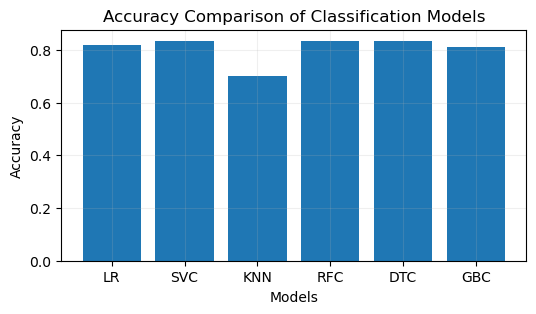

In [54]:
model_accuracy = {'LR': lr_results['accuracy'],
                  'SVC': svc_results['accuracy'],
                  'KNN': knn_results['accuracy'],
                  'RFC': rfc_results['accuracy'],
                  'DTC': dtc_results['accuracy'],
                  'GBC': gbc_results['accuracy']}

plt.figure(figsize = (6, 3))

plt.bar(model_accuracy.keys(), model_accuracy.values())
plt.title('Accuracy Comparison of Classification Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(alpha = 0.2)

plt.show()

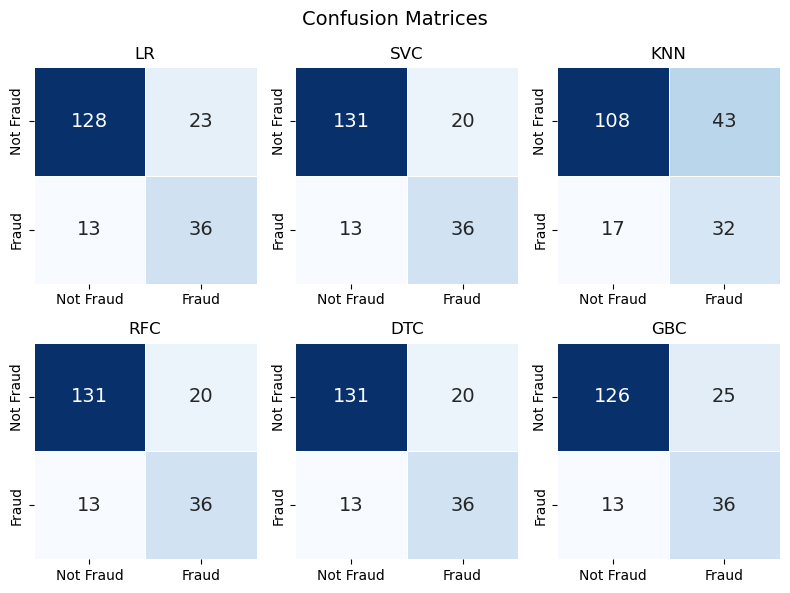

In [55]:
confusion_matrices = {'LR': lr_results['confusion_matrix'],
                      'SVC': svc_results['confusion_matrix'],
                      'KNN': knn_results['confusion_matrix'],
                      'RFC': rfc_results['confusion_matrix'],
                      'DTC': dtc_results['confusion_matrix'],
                      'GBC': gbc_results['confusion_matrix']}

fig, axes = plt.subplots(2, 3, figsize = (8, 6))
plt.suptitle('Confusion Matrices', fontsize = 14)
axes = axes.flatten()

for index, (model, matrix) in enumerate(confusion_matrices.items()):
    sns.heatmap(matrix, annot = True, linewidths = 0.5, ax = axes[index], cbar = False, xticklabels = ['Not Fraud', 'Fraud'], 
                yticklabels = ['Not Fraud', 'Fraud'], cmap = 'Blues', fmt = 'd', annot_kws = {"size": 14})
    axes[index].set_title(f'{model}')
    
plt.tight_layout()
plt.show()

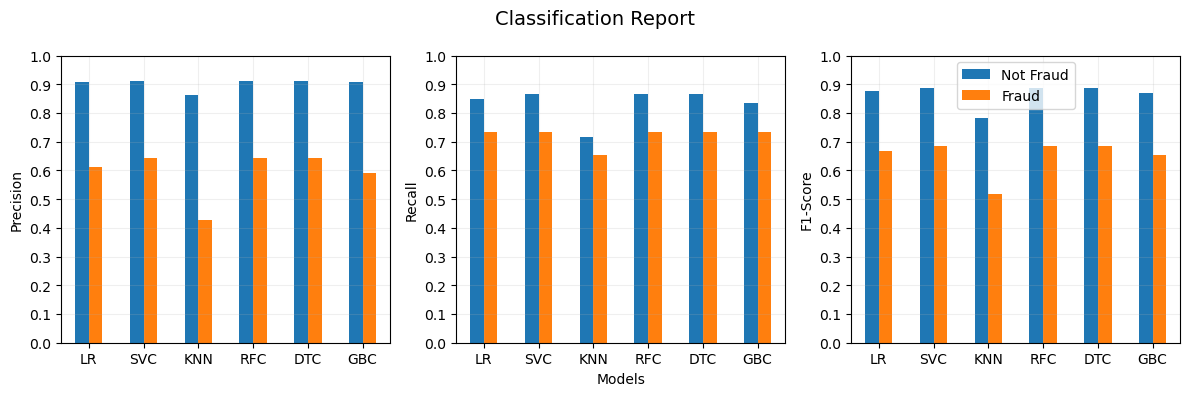

In [56]:
classification_reports = {'LR': lr_results['classification_report'],
                          'SVC': svc_results['classification_report'],
                          'KNN': knn_results['classification_report'],
                          'RFC': rfc_results['classification_report'],
                          'DTC': dtc_results['classification_report'],
                          'GBC': gbc_results['classification_report']}

precision_dict, recall_dict, f1_dict = {}, {}, {}

for model, report in classification_reports.items():
    precision_dict[model] = {'Not Fraud': report['0']['precision'],
                             'Fraud': report['1']['precision']}
    recall_dict[model] = {'Not Fraud': report['0']['recall'],
                          'Fraud': report['1']['recall']}
    f1_dict[model] = {'Not Fraud': report['0']['f1-score'],
                      'Fraud': report['1']['f1-score']}

precision_df = pd.DataFrame(precision_dict).T.reset_index()
recall_df = pd.DataFrame(recall_dict).T.reset_index()
f1_df = pd.DataFrame(f1_dict).T.reset_index()

fig, axes = plt.subplots(1, 3, figsize = (12, 4))
plt.suptitle('Classification Report', fontsize = 14)

precision_df.plot(x = 'index', y = ['Not Fraud', 'Fraud'], kind = 'bar', ax = axes[0], legend = False, rot = 0)
axes[0].set_ylabel('Precision')

recall_df.plot(x = 'index', y = ['Not Fraud', 'Fraud'], kind = 'bar', ax = axes[1], legend = False, rot = 0)
axes[1].set_ylabel('Recall')

f1_df.plot(x = 'index', y = ['Not Fraud', 'Fraud'], kind = 'bar', ax = axes[2], rot = 0)
axes[2].set_ylabel('F1-Score')

for axe in axes:
    axe.set_ylim(0, 1)
    axe.set_yticks(np.arange(0, 1.1, 0.1))
    axe.grid(alpha = 0.2)
    axe.set_xlabel('')

axes[1].set_xlabel('Models')

plt.tight_layout()
plt.show()

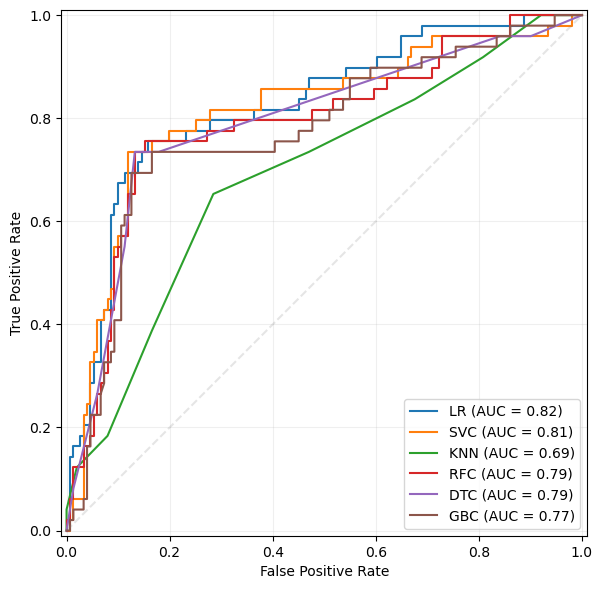

In [57]:
from sklearn.metrics import auc, RocCurveDisplay

roc_graph = {'LR': lr_results['roc_auc'],
             'SVC': svc_results['roc_auc'],
             'KNN': knn_results['roc_auc'],
             'RFC': rfc_results['roc_auc'],
             'DTC': dtc_results['roc_auc'],
             'GBC': gbc_results['roc_auc']}

fig, axes = plt.subplots(1, 1, figsize = (12, 6))

for model, report in roc_graph.items():
    fpr, tpr = report[0], report[1]
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, name = model)
    display.plot(ax = axes)

plt.plot([0, 1], [0, 1], alpha = 0.2, color = 'gray', linestyle = '--')
plt.grid(alpha = 0.2)

plt.tight_layout()
plt.legend()
plt.show()

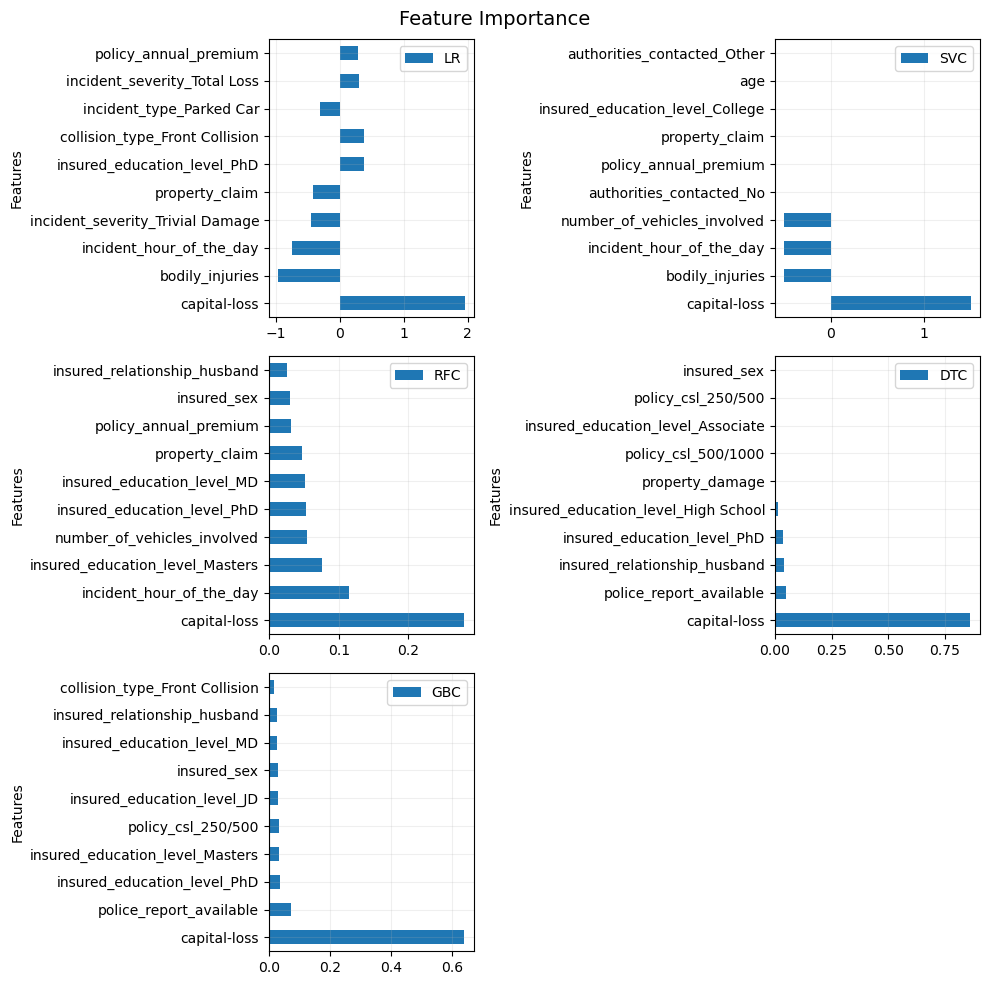

In [58]:
features_df = pd.DataFrame({'Features': x_train.columns, 
                            'LR': lr_threshold.estimator.named_steps['model'].coef_[0],
                            'SVC': svc_threshold.estimator.named_steps['model'].coef_[0],
                            'RFC': best_rfc.named_steps['model'].feature_importances_,
                            'DTC': best_dtc.named_steps['model'].feature_importances_,
                            'GBC': gbc_threshold.estimator.named_steps['model'].feature_importances_})

features_df['lr_abs'] = features_df['LR'].abs()
features_df['svc_abs'] = features_df['SVC'].abs()

fig, axes = plt.subplots(3, 2, figsize = (10, 10))
axes = axes.flatten()
plt.suptitle('Feature Importance', fontsize = 14)

features_df.sort_values('lr_abs', ascending = False).head(10).plot(x = 'Features', y = 'LR', kind = 'barh', ax = axes[0])
features_df.sort_values('svc_abs', ascending = False).head(10).plot(x = 'Features', y = 'SVC', kind = 'barh', ax = axes[1])
features_df.sort_values('RFC', ascending = False).head(10).plot(x = 'Features', y = 'RFC', kind = 'barh', ax = axes[2])
features_df.sort_values('DTC', ascending = False).head(10).plot(x = 'Features', y = 'DTC', kind = 'barh', ax = axes[3])
features_df.sort_values('GBC', ascending = False).head(10).plot(x = 'Features', y = 'GBC', kind = 'barh', ax = axes[4])
axes[5].set_visible(False)

for i in range(5):
    axes[i].grid(alpha = 0.2)

plt.tight_layout()
plt.show()